### Exercise 11.1

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [23]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

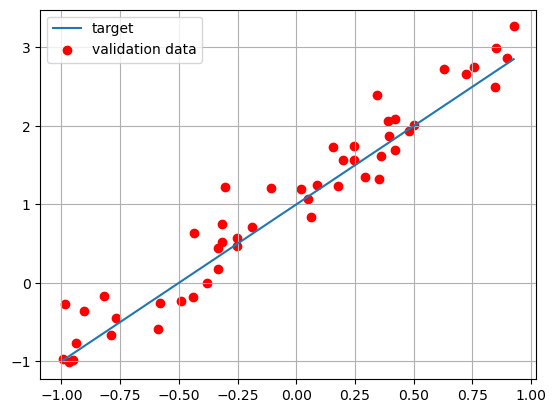

In [24]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras import backend as K
# from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [90]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 1.0076 - mse: 1.0076 - val_loss: 0.8970 - val_mse: 0.8970
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6319 - mse: 0.6319 - val_loss: 0.5948 - val_mse: 0.5948
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4225 - mse: 0.4225 - val_loss: 0.4198 - val_mse: 0.4198
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.3035 - mse: 0.3035 - val_loss: 0.3139 - val_mse: 0.3139
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.2482 - val_mse: 0.2482
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1906 - mse: 0.1906 - val_loss: 0.2050 - val_mse: 0.2050
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1626 - mse: 0.1626 - val_loss: 0.1757 - val_mse: 0.1757
Epoch 8/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1440 - mse: 0.1

In [26]:
# return weights and biases
model.get_weights()

[array([[0.8172486 , 0.88870883, 1.2284671 , 1.4551522 , 0.60172206]],
       dtype=float32),
 array([0.81612355, 0.8167095 , 0.8194936 , 0.8213517 , 0.814358  ],
       dtype=float32)]

In [91]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.1013 - mse: 0.1013

Test loss: 0.10129819810390472
Test accuracy: 0.10129819810390472


In [28]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.3638 - mse: 0.3638

Test loss: 0.3637560307979584
Test accuracy: 0.3637560307979584


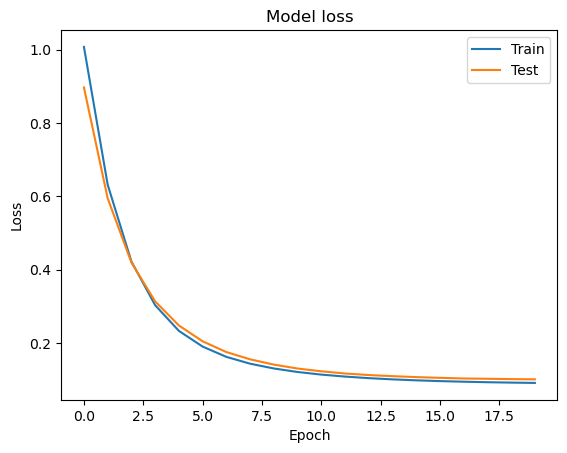

In [92]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 6ms/step


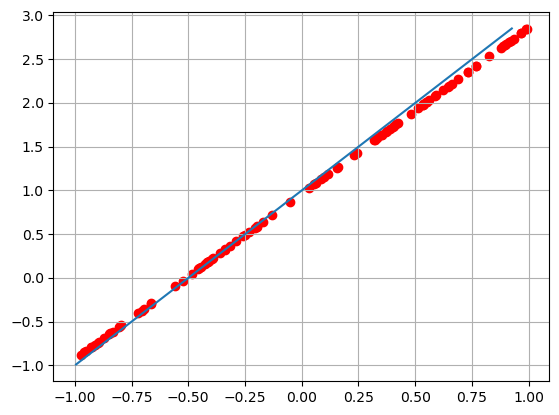

In [72]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## Exercise 11.2


Building a NN to fit the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$

In [252]:
def poli(x):
    return 4 - 3*x -2*x*x + 3*x*x*x

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = poli(x_valid) 

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(poli(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(poli(x_valid), sigma)

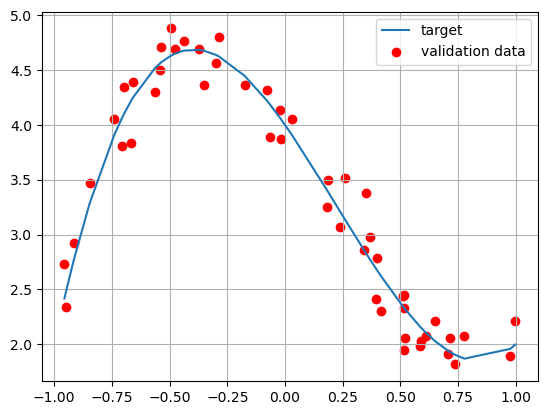

In [253]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [260]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='relu'))  
model.add(Dense(10, activation='selu'))  # Secondo strato nascosto
model.add(Dense(10, activation='selu'))  # Secondo strato nascosto
model.add(Dense(10, activation='selu'))  # Secondo strato nascosto
model.add(Dense(1))  # Strato di uscita

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [261]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/200
16/16 [==============================] - 1s 17ms/step - loss: 7.5310 - mse: 7.5310 - val_loss: 5.4153 - val_mse: 5.4153
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 4.5030 - mse: 4.5030 - val_loss: 3.0170 - val_mse: 3.0170
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 2.5968 - mse: 2.5968 - val_loss: 1.7249 - val_mse: 1.7249
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 1.7108 - mse: 1.7108 - val_loss: 1.2422 - val_mse: 1.2422
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 1.3950 - mse: 1.3950 - val_loss: 1.0053 - val_mse: 1.0053
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 1.1668 - mse: 1.1668 - val_loss: 0.8342 - val_mse: 0.8342
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9834 - mse: 0.9834 - val_loss: 0.7019 - val_mse: 0.7019
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 0.8573 - 

In [262]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0438 - mse: 0.0438

Test loss: 0.043751202523708344
Test accuracy: 0.043751202523708344


In [263]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043

Test loss: 0.00425459910184145
Test accuracy: 0.00425459910184145


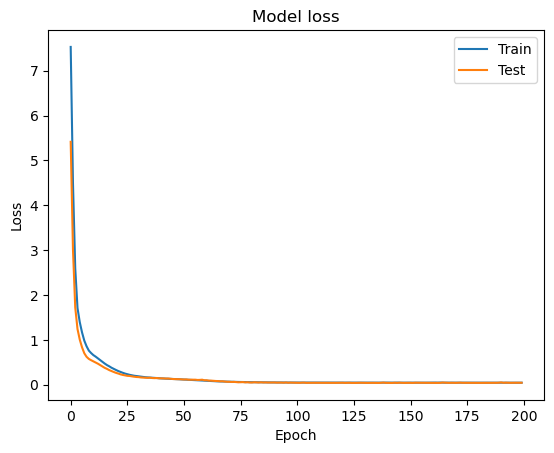

In [264]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step
(100, 1)
(100,)


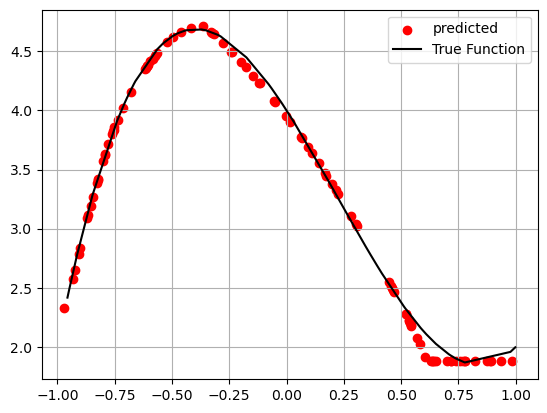

In [265]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
print(y_predicted.shape)
print(x_predicted.shape)
plt.scatter(x_predicted, y_predicted,color='r', label="predicted")
plt.plot(x_valid, y_target, label='True Function', color='black')

# Aggiungi la griglia e la legenda
plt.grid(True)
plt.legend()
plt.show()

Il numero di epoche è uno dei fattori rilevanti alla riuscita del fit insieme dal numero di layer.
Sotto 5 neuroni per layer il fit non viene bene.
optimizer "adam" funziona meglio di "sgd"
la funzione di attivazione "selu" funziona meglio della "relu" nei 3 layer nascosti

## Exercise 11.3
  
Building a model to fit a simple trigonometric 2D function : $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### I) Visualizzazione funziona da fittare


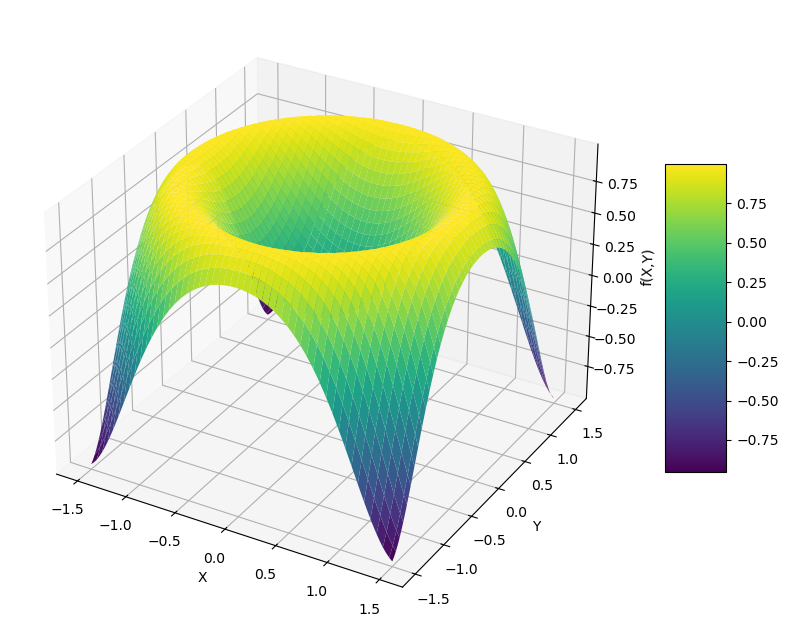

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definizione della funzione f(x, y)
def f(x, y):
    return np.sin(x**2 + y**2)

# Generazione di punti x e y nella griglia desiderata
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Creazione della figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Aggiunta delle etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')

# Aggiunta della barra del colore
fig.colorbar(surf, shrink=0.5, aspect=5)

# Mostrare il grafico
plt.show()


### II) creazione dataset

In [266]:
def func(x, y):
    return np.sin(x**2 + y**2)

x_train = np.random.uniform(-1, 1, 500)
y_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
y_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_valid.sort()
z_target = func(x_valid, y_valid) 

sigma = 0.2 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(x_valid, y_valid), sigma)

### III) Costruzione NN

In [290]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(3, input_shape=(2,), activation='relu'))  # Primo strato nascosto
model.add(Dense(10,input_dim=2, activation='selu'))  # primo strato nascosto
model.add(Dense(10,input_dim=2, activation='selu'))  # Secondo strato nascosto
model.add(Dense(10,input_dim=2, activation='selu'))  # Secondo strato nascosto
model.add(Dense(1))  # Strato di uscita

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

### IV) Addestramento modello

In [291]:
# Addestramento del modello
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train, validation_data=(np.column_stack((x_valid, y_valid)), z_valid),
                    batch_size=32, epochs=150, verbose=1)

Epoch 1/150
16/16 [==============================] - 1s 23ms/step - loss: 0.5553 - mse: 0.5553 - val_loss: 0.4585 - val_mse: 0.4585
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 0.1881 - mse: 0.1881 - val_loss: 0.1446 - val_mse: 0.1446
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 0.1232 - mse: 0.1232 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 0.1011 - mse: 0.1011 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 0.0961 - mse: 0.0961 - val_loss: 0.0795 - val_mse: 0.0795
Epoch 6/150
16/16 [==============================] - 0s 5ms/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 7/150
16/16 [==============================] - 0s 5ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0741 - val_mse: 0.0741
Epoch 8/150
16/16 [==============================] - 0s 5ms/step - loss: 0.0892 - 

### V) Valutazione modello sui dati di validazione 

In [292]:
# Valutazione del modello su dati di validazione
loss = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid)
print(f'Validation Loss: {loss}')

2/2 [==============================] - 0s 5ms/step - loss: 0.0469 - mse: 0.0469
Validation Loss: [0.04687633365392685, 0.04687633365392685]


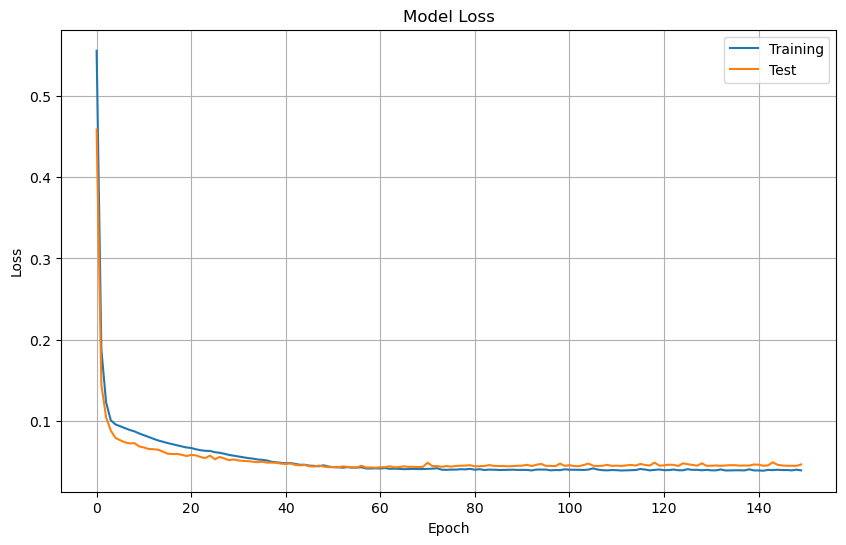

In [302]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### VI) Predizioni modello

In [298]:
# Generazione di nuovi dati per predizione
x_test = np.linspace(-1.5, 1.5, 100)
y_test = np.linspace(-1.5, 1.5, 100)
X_test, Y_test = np.meshgrid(x_test, y_test)
Z_test = np.sin(X_test**2 + Y_test**2)

# Predizione con il modello addestrato
Z_pred = model.predict(np.column_stack((X_test.ravel(), Y_test.ravel())))
Z_pred = Z_pred.reshape(X_test.shape)

313/313 [==============================] - 0s 1ms/step


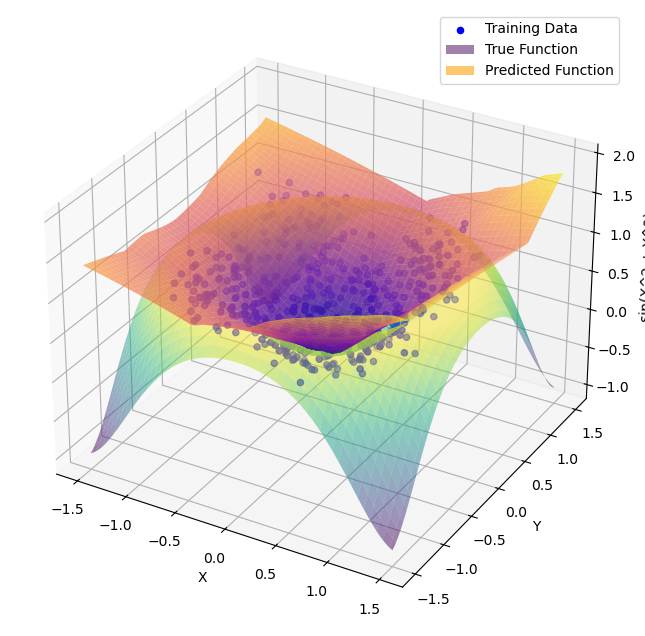

In [301]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot dei dati reali
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train, y_train, z_train, color='blue', label='Training Data')
ax.plot_surface(X_test, Y_test, Z_test, cmap='viridis', alpha=0.5, label='True Function')

# Plot delle predizioni del modello
ax.plot_surface(X_test, Y_test, Z_pred, cmap='plasma', alpha=0.7, label='Predicted Function')

# Etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('sin(X^2 + Y^2)')

# Aggiunta della legenda
ax.legend()

# Mostra il grafico
plt.show()
